<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

Create Dataset:

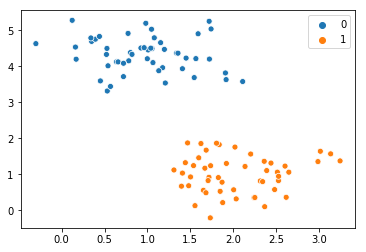

In [2]:
m = NUM_POINTS = 100
n = NUM_FEATURES = 2

X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5, random_state=0)

'''
X = np.array([[0, 1], [1, 0], [2, 2], [3, 3]])
y = np.array([0, 0, 1, 1]).reshape((4,))
m = 4
n = 2

X = np.array([[0, 1], [1, 0], [2, 2]])
y = np.array([0, 0, 1]).reshape((3,))
m = 3
n = 2

X = np.array([[1, 1], [2, 2]])
y = np.array([0, 1]).reshape((2,))
m = 2
n = 2
'''

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

y = 2*y - 1  # Change y to be -1 and 1 instead of 0 and 1


Create F array

In [3]:
def kernel(x1, x2, type):
  if type=='no-kernel':
    return np.dot(x1, x2)

F = np.zeros((m, m))
for i in range(m):
  for j in range(m):
    F[i, j] = y[i]*y[j]*kernel(X[i], X[j], 'no-kernel')

print(F)

[[12.29217997  5.71027907 -8.44567598 ...  9.41047684 -7.10399264
   6.59189542]
 [ 5.71027907  2.65564711 -3.70342108 ...  4.38725162 -3.0998671
   3.03303505]
 [-8.44567598 -3.70342108 22.14227201 ... -5.30290387 19.75575739
  -6.6981246 ]
 ...
 [ 9.41047684  4.38725162 -5.30290387 ...  7.28709622 -4.3799922
   4.89217312]
 [-7.10399264 -3.0998671  19.75575739 ... -4.3799922  17.6469807
  -5.7841949 ]
 [ 6.59189542  3.03303505 -6.6981246  ...  4.89217312 -5.7841949
   3.82294103]]


Solve System

In [5]:
'''

X_temp = np.copy(X)
y_temp = np.copy(y)
sol_found = False

while not sol_found:
  lambdas = np.linalg.lstsq(F, np.ones(F.shape[0]))
  lambdas = np.maximum(lambdas, 0)
  remove = (lambdas == 0)
  keep = (lambdas != 0)
  if len(remove) == 0:
    sol_found = True
  else:
    F = F[keep]
    F = F[:, keep]
    X_temp = X_temp[keep]
    y_temp = y_temp[keep]
    print(y_temp.shape)
'''




(array([ 0.00897335,  0.00432499,  0.00545569,  0.00283248,  0.00795921,
        0.00073152,  0.00244586,  0.00844106,  0.00313753,  0.0051197 ,
        0.00339483,  0.00557399,  0.00298706,  0.00431985,  0.00501035,
        0.00964647,  0.00884764,  0.00360616,  0.00404097,  0.00430151,
        0.00265471,  0.00325827,  0.0036385 ,  0.0053872 ,  0.00712035,
        0.00313924,  0.00532233,  0.00391873,  0.00210663,  0.00564785,
        0.00752093,  0.00275865,  0.00405186,  0.00755139,  0.00396365,
        0.00042634,  0.00483489,  0.00471645, -0.00025707,  0.00308382,
        0.00352047,  0.00097225,  0.00710443,  0.00145307,  0.00257748,
        0.00590675,  0.00682714,  0.00641256,  0.00590524,  0.00425537,
        0.00636083,  0.00356151,  0.0013566 ,  0.00252945, -0.00243389,
        0.00272184, -0.00166685,  0.00523614,  0.0074805 ,  0.00832472,
        0.00444307,  0.00085543,  0.00532829,  0.00697291,  0.00344314,
        0.00379393,  0.00380388, -0.00137426,  0.00755954,  0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Calculate Weights and Bias

In [0]:
W = np.zeros(n)
for i in range(m):
  W += lambdas[i]*y[i]*X[i]

b = 0
for i in range(m):
  b -= lambdas[i]*y[i] # This is wrong

print(W)
print(b)

Graph Decision Boundary

In [0]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
x_plot = np.linspace(-1, 4, 100)
y_plot = (-W[0]*x_plot - b)/W[1]
y_plot_2 = (1-W[0]*x_plot - b)/W[1]
y_plot_3 = (-1-W[0]*x_plot - b)/W[1]
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_plot_2)
plt.plot(x_plot, y_plot_3)
plt.show()